#### Import the Dataset Into Pytorch

Use the `torchvision.datasets.ImageFolder` class to load the dataset.

In [45]:
from torchvision.datasets import ImageFolder

In [46]:
data_dir = 'C:\\Users\\DexTerMtor\\Desktop\\Flower-Species-Classification\\flowers'
dataset = ImageFolder(data_dir)

In [47]:
len(dataset)

4317

In [48]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x263>, 0)

In [49]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

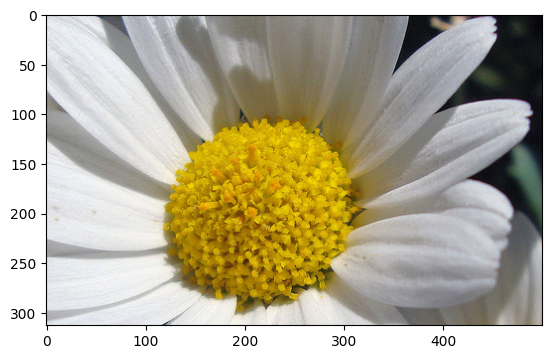

In [51]:
img, lable = dataset[1]
plt.imshow(img)

#### Data Augmentation and Normalization for Training

here we will croping and fixing the size of the image to 224x224 and then normalizing the image.

In [52]:
import torchvision.transforms as tt

dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(224), 
                                            tt.RandomCrop(224),
                                            tt.ToTensor()]))

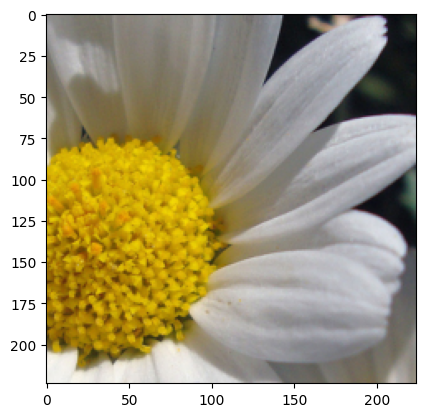

In [53]:
img, lable = dataset[1]
plt.imshow(img.permute((1,2,0)))

In [54]:
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

train_size, val_size

(3886, 431)

In [55]:
from torch.utils.data import random_split, DataLoader

train_data, valid_data = random_split(dataset, [ train_size, val_size])
len(train_data), len(valid_data)

(3886, 431)

In [56]:
batch_size = 256

train_dl = DataLoader(train_data, 
                      batch_size,
                      shuffle=True,
                      num_workers = 4,
                      pin_memory=True)

valid_dl = DataLoader(valid_data,
                      batch_size,
                      num_workers=4,
                      pin_memory=True)

### making grid view for the training data of images

In [57]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6)) 
        ax.set_xticks([]) 
        ax.set_yticks([])  
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))  
        plt.show()
        break

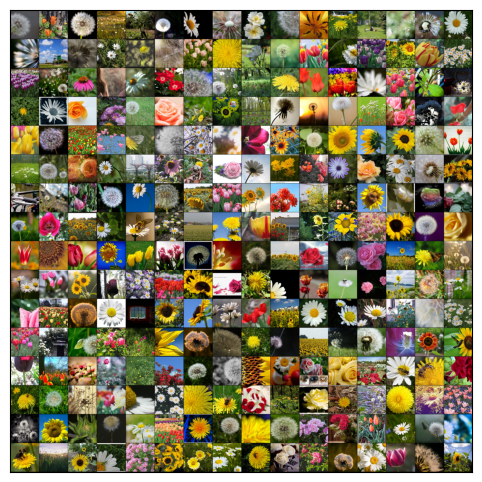

In [58]:
show_batch(train_dl)

#### GPU Utility Functions and Classes for Training and Evaluation

In [61]:
import torch 
def get_default_device():
     """Pick GPU if available, else CPU"""
     if torch.cuda.is_available():
          return torch.device('cuda')
     else:
          return torch.device('cpu')

def to_device(data, device):
     """Move tensor(s) to choosen device"""
     if isinstance(data, (list,tuple)):
          return [to_device(x, device) for x in data]
     return data.to(device, non_blocking=True)

class DeviceDataLoader():
     """Wrap a dataloader to move data to device"""
     def __init__(self, dl, device):
          self.dl = dl
          self.device = device
     
     def __iter__(self):
          """Yield a batch of data after moving it to device"""
          for b in self.dl:
               yield to_device(b, self.device)
               
     def __len__(self):
          """Number of batches"""

          return len(self.dl)

In [62]:
device = get_default_device()

In [63]:
device

device(type='cuda')

#### loading traininig data and testing data on the gpu using dataloader

In [70]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

#### Defining the Model and Training the utilities